# Начало

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aQdePzAoccvOcPnBipoR")
project = rf.workspace("mycollege").project("tumor-detection-2")
dataset = project.version(3).download("yolov5")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tumor-detection-2-3 in yolov5pytorch:: 100%|██████████| 3414/3414 [00:00<00:00, 4487.32it/s]


Убедимся, что у нас есть доступ к графическому процессору. Для этого мы можем использовать команду `nvidia-smi`.

In [ ]:
!nvidia-smi

Fri Nov  3 13:22:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Обучение модели YOLOv5

Импортируем библиотеки и репозитории для работы с моделями YOLO

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-232-g1c60c53 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.4/78.2 GB disk)


Обучим предобученную модель YOLOv5m-seg.pt (используем среднюю конфигурацию yolo модели для рещения задачи сегментации) на датасете с опухолями мозга с помощью `CLI`

В аргументы передаем `--img` с размером изображений `640`, `--batch` с размером сета изображений равном `8`, `--epochs` возьмём одинаковое для обоих моделей `150` и укажем пути к датасету `--data` и `--weights` весам предобученной модели.

In [ ]:
!python segment/train.py --img 640 --batch 8 --epochs 150 --data /content/datasets/yolov5/tumor-detection-2-3/data.yaml --weights yolov5m-seg.pt --cache

2023-11-03 13:31:31.267262: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-03 13:31:31.267327: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-03 13:31:31.267370: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5m-seg.pt, cfg=, data=/content/datasets/yolov5/tumor-detection-2-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=Fa

In [ ]:
from distutils.dir_util import copy_tree
copy_tree("/content/datasets/yolov5/runs/train-seg", "/content/drive/MyDrive/tumorv4")

['/content/drive/MyDrive/tumorv4/exp2/val_batch1_labels.jpg',
 '/content/drive/MyDrive/tumorv4/exp2/results.csv',
 '/content/drive/MyDrive/tumorv4/exp2/BoxPR_curve.png',
 '/content/drive/MyDrive/tumorv4/exp2/MaskP_curve.png',
 '/content/drive/MyDrive/tumorv4/exp2/MaskF1_curve.png',
 '/content/drive/MyDrive/tumorv4/exp2/MaskR_curve.png',
 '/content/drive/MyDrive/tumorv4/exp2/val_batch2_pred.jpg',
 '/content/drive/MyDrive/tumorv4/exp2/results.png',
 '/content/drive/MyDrive/tumorv4/exp2/val_batch0_pred.jpg',
 '/content/drive/MyDrive/tumorv4/exp2/opt.yaml',
 '/content/drive/MyDrive/tumorv4/exp2/train_batch0.jpg',
 '/content/drive/MyDrive/tumorv4/exp2/val_batch2_labels.jpg',
 '/content/drive/MyDrive/tumorv4/exp2/events.out.tfevents.1699018294.2af08dfd4853.4526.0',
 '/content/drive/MyDrive/tumorv4/exp2/val_batch1_pred.jpg',
 '/content/drive/MyDrive/tumorv4/exp2/MaskPR_curve.png',
 '/content/drive/MyDrive/tumorv4/exp2/train_batch1.jpg',
 '/content/drive/MyDrive/tumorv4/exp2/BoxP_curve.png',
 

# Валидация модели

Запустим полученный набор весов YOLOv5 по валидационной выборке датасета

In [ ]:
%cd {HOME}

!python yolov5/segment/val.py --weights /content/yolov5/runs/train-seg/exp2/weights/best.pt --data /content/yolov5/tumor-detection-2-3/data.yaml --img 640 --half

/content
segment/val: data=/content/yolov5/tumor-detection-2-3/data.yaml, weights=['/content/yolov5/runs/train-seg/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val-seg, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-232-g1c60c53 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 220 layers, 21660440 parameters, 0 gradients, 69.9 GFLOPs
val: Scanning /content/yolov5/tumor-detection-2-3/valid/labels... 337 images, 1 backgrounds, 0 corrupt: 100% 337/337 [00:00<00:00, 945.01it/s]
val: New cache created: /content/yolov5/tumor-detection-2-3/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:14<00:00,  1.27

Значени метрик: **Precision:** Mask - 59.7%, Box - 60.7%, **Recall:** Mask - 67.8, Box - 68.9%, **mAP50:** Mask - 64.5% Box - 66.2%, **mAP50-95:** Mask - 50.6, Box - 49.6%

# Тестирование моделей

Запустим YOLOv5 на тестовой выборке

In [ ]:
!python yolov5/segment/predict.py --weights /content/yolov5/runs/train-seg/exp2/weights/best.pt --source /content/yolov5/tumor-detection-2-3/test/images --img 640 --half

segment/predict: weights=['/content/yolov5/runs/train-seg/exp2/weights/best.pt'], source=/content/yolov5/tumor-detection-2-3/test/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=True, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-232-g1c60c53 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 220 layers, 21660440 parameters, 0 gradients, 69.9 GFLOPs
image 1/177 /content/yolov5/tumor-detection-2-3/test/images/y1006_jpg.rf.c52ed98268f69c7135ceb8a31ba15796.jpg: 640x640 1 tumor_moderate_chance, 16.4ms
image 2/177 /content/yolov5/tumor-detection-2-3/test/images/y1008_jpg.rf.e9347b8da59527672e3e583d5

# Результаты

Рассмотрим графики показателей модели YOLOv5

In [ ]:
from IPython.display import display, Image

/content


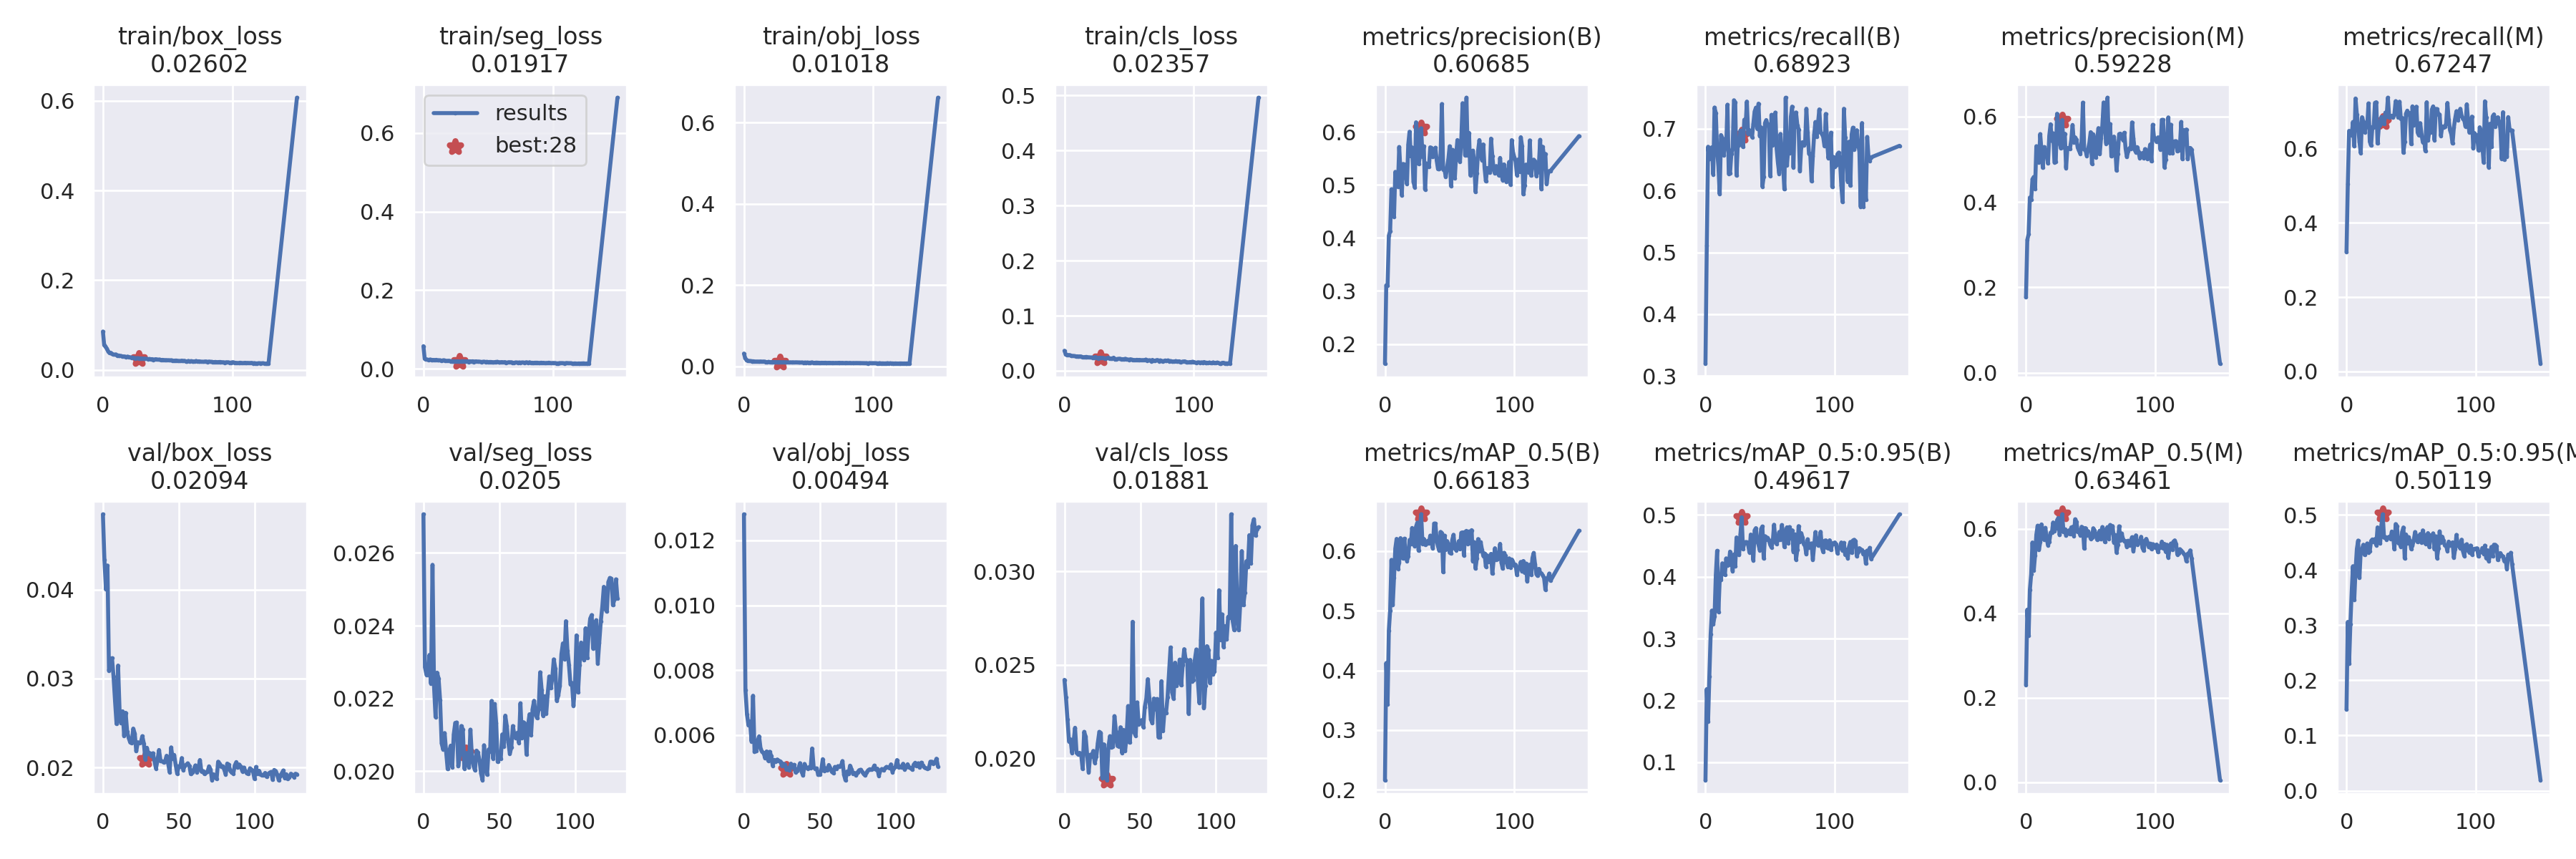

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/yolov5/runs/train-seg/exp2/results.png', width=1200)

Можно заметить, что у YOLOv5 на графиках наблюдается переобучение после 28 итерации. Следовательно, YOLOv5 не нуждается в большом количестве итераций для того, чтобы обеспечивать свой наилучший результат в нашей задаче.

# Примеры сегментации и классификации модели

/content


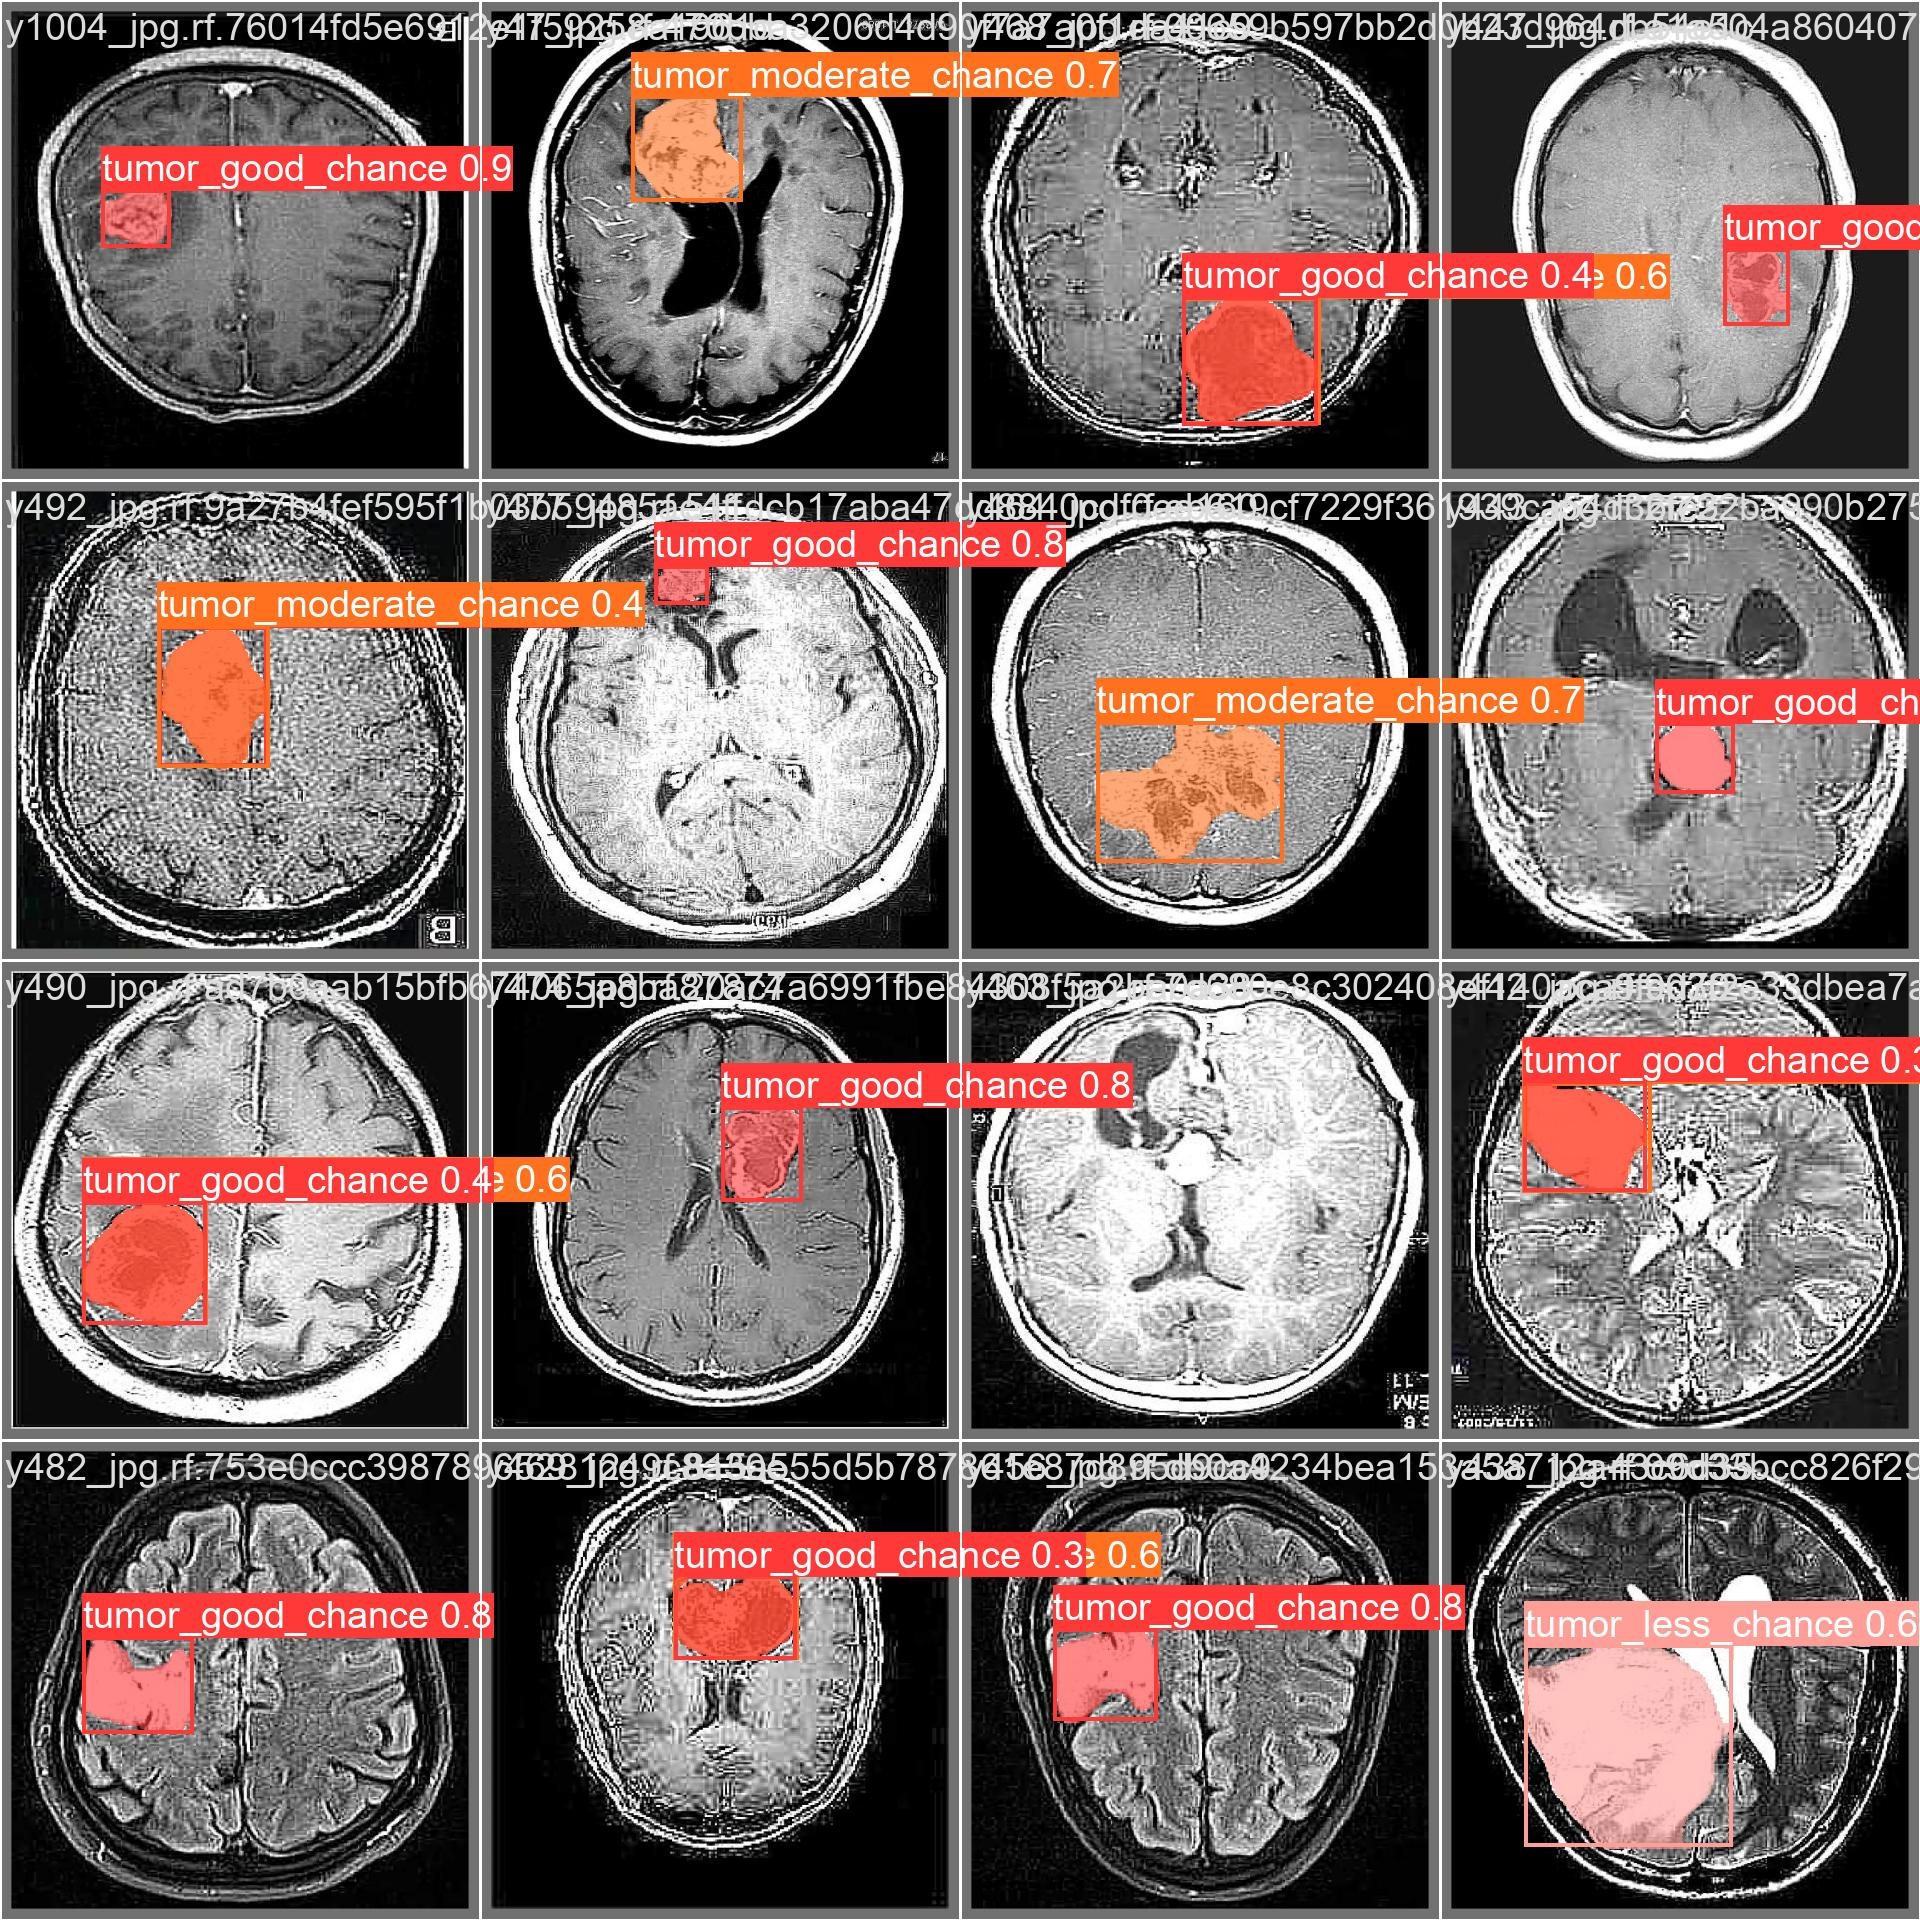

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/yolov5/runs/train-seg/exp2/val_batch0_pred.jpg', width=1200)